<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие файлов и изучение общей информации" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файлов и изучение общей информации</a></span><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><li><span> <span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Шаг 1. Открытие файлов и изучение общей информации

Импортируем необходимые нам библиотеки

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt


Прочитаем по отдельности каждый датафрейм

In [2]:
df_users = pd.read_csv('/datasets/users.csv')

Получим первые 50 строк таблицы

In [3]:
df_users.head(50)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Наблюдаем NaNы в столбце churn_date. В дальнейшем обработаем пропуски, заменив их значениями "-1".
Смотрим следующий датафрейм

In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
df_messages = pd.read_csv('/datasets/messages.csv')

Прочитаем так же первые 50 строк

In [6]:
df_messages.head(50)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Проверим, сколько проусков в этом датасете

In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Видим, что все ячейки заполнены, дальнейшей предобработки данных не требуется.
Смотрим следующий датасет

In [8]:
df_internet = pd.read_csv('/datasets/internet.csv')

Выведем информацию о количестве значений в таблице

In [9]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Выведем первые 10 строк

In [10]:
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Удалим пустой столбец Unnamed: 0

In [11]:
df_internet = df_internet.drop(['Unnamed: 0'],axis = 1)
df_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


Сразу проведём процедуру округления вверх для столбца mb_used

In [12]:
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
print(df_internet['mb_used'])

0          113.0
1         1053.0
2         1198.0
3          551.0
4          303.0
           ...  
149391     319.0
149392     491.0
149393       0.0
149394    1247.0
149395     545.0
Name: mb_used, Length: 149396, dtype: float64


In [13]:
df_internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Видим, что пропущенных значений тут так же нет.
Смотрим следующий датасет

In [14]:
df_calls = pd.read_csv('/datasets/calls.csv')

Выведем первые пятьдесят строк

In [15]:
df_calls.head(20)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Так же проведём процедуру округления вверх для столбца duration

In [16]:
df_calls['duration']=df_calls['duration'].round()
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,5.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,18.0,1000
8,1000_8,2018-09-15,18.0,1000
9,1000_9,2018-08-15,0.0,1000


Избавимся от нулевых значений в столбце duration - эти строчки в таблице не несут никакой информации

In [17]:
#df_calls = df_calls.dropna(subset = ['duration'])
##df_calls.head(10)
df_calls = df_calls.query('duration > 0')
df_calls.head(10)

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,5.0,1000
7,1000_7,2018-08-22,18.0,1000
8,1000_8,2018-09-15,18.0,1000
10,1000_10,2018-08-22,5.0,1000
11,1000_11,2018-05-28,19.0,1000
12,1000_12,2018-07-05,2.0,1000
13,1000_13,2018-09-29,7.0,1000
14,1000_14,2018-12-11,9.0,1000


Хоть данные в столбце duration внесены неправильно, считаны они верно. Пропущенные значения в этом столбце будут в дальнейшем удалены. 
Проверим на наличие пропущенных значений

In [18]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158827 entries, 2 to 202606
Data columns (total 4 columns):
id           158827 non-null object
call_date    158827 non-null object
duration     158827 non-null float64
user_id      158827 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


Их нет. Датафрем tariffs проверять не нужно.

# Шаг 2. Подготовка данных

Добавим столбец с номером месяца в датафрейм calls

In [19]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format = '%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month
print(df_calls['month'])

2          6
3          9
4         12
7          8
8          9
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: month, Length: 158827, dtype: int64


Посчитаем суммарное количество звонков по каждому пользователю. Выведем первые десять строк новой таблицы

In [20]:
df_calls_data = (df_calls.query('duration > 0').pivot_table(index = ['user_id','month'],values = ['duration'],aggfunc = {'count','sum'}).reset_index())
df_calls_data.columns = ['user_id','month','count_calls','minutes']
df_calls_data.head(10)

,user_id,month,count_calls,minutes
0,1000,5,16,149.0
1,1000,6,27,159.0
2,1000,7,39,319.0
3,1000,8,42,391.0
4,1000,9,45,439.0
5,1000,10,40,328.0
6,1000,11,37,318.0
7,1000,12,37,314.0
8,1001,11,45,410.0
9,1001,12,45,393.0


Добавим столбец с номером месяца в датафрейм messages

In [21]:
df_messages['message_date']=pd.to_datetime(df_messages['message_date'],format = '%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month
print(df_messages['month'])

0          6
1         10
2          8
3          6
4         12
          ..
123031    12
123032     9
123033     9
123034    11
123035    11
Name: month, Length: 123036, dtype: int64


Посчитаем суммарное количество смс по каждому пользователю

In [22]:
df_messages_data = (df_messages.pivot_table(index = ['user_id','month'],values = 'id',aggfunc = 'count').reset_index())
df_messages_data.columns = ['user_id','month','messages']
df_messages_data.head(10)

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Добавим столбец month в датафрейм internet

In [23]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format = '%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month
print(df_messages['month'])

0          6
1         10
2          8
3          6
4         12
          ..
123031    12
123032     9
123033     9
123034    11
123035    11
Name: month, Length: 123036, dtype: int64


Посчитаем суммарное количество трафика по каждому пользователю

In [24]:
df_internet_data = (df_internet.pivot_table(index = ['user_id','month'],values = ['mb_used'],aggfunc = {'mb_used':'sum'}).reset_index())
df_internet_data.columns = ['user_id','month','mb_used']
df_internet_data.head(10)

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
5,1000,10,14717.0
6,1000,11,14768.0
7,1000,12,9827.0
8,1001,11,18452.0
9,1001,12,14053.0


Соединим между собой таблицы звонков, смс и интернета на основе user_id и месяца. Полученную таблицу соединим с таблицей юзеров.

In [25]:
df_users_counts = df_calls_data.merge(df_messages_data,how = 'outer',on=['user_id','month'])
df_users_counts = df_users_counts.merge(df_internet_data,how = 'outer',on = ['user_id','month'])
df_users_counts = df_users.merge(df_users_counts,how='outer',on = ['user_id'])
df_users_counts.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_calls,minutes,messages,mb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,16.0,149.0,22.0,2256.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,27.0,159.0,60.0,23257.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,39.0,319.0,75.0,14016.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,42.0,391.0,81.0,14070.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,45.0,439.0,57.0,14581.0
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,40.0,328.0,73.0,14717.0
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,37.0,318.0,58.0,14768.0
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,37.0,314.0,70.0,9827.0
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11.0,45.0,410.0,NaN,18452.0
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,12.0,45.0,393.0,NaN,14053.0


Посчитаем помесячную выручку с каждого пользователя. Добавим в новый столбец proceeds сводной таблицы df_users_counts
Вернёмся к обработке NAN-ов в столбце messages.

In [26]:
df_users_counts['messages'] =  df_users_counts['messages'].fillna(0)
df_users_counts.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_calls,minutes,messages,mb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,16.0,149.0,22.0,2256.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,27.0,159.0,60.0,23257.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,39.0,319.0,75.0,14016.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,42.0,391.0,81.0,14070.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,45.0,439.0,57.0,14581.0
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,40.0,328.0,73.0,14717.0
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,37.0,318.0,58.0,14768.0
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,37.0,314.0,70.0,9827.0
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11.0,45.0,410.0,0.0,18452.0
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,12.0,45.0,393.0,0.0,14053.0


Теперь разберёмся с NaN-ами в столбце churn_date. Пропущенные значения - показатель того, что клиент тарифом ещё пользуется. Заменим их на самый последний день 2018-го года.

In [27]:
df_users_counts['churn_date'] = df_users_counts['churn_date'].fillna(value = '2018-12-31')
df_users_counts.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_calls,minutes,messages,mb_used
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,16.0,149.0,22.0,2256.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,27.0,159.0,60.0,23257.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,39.0,319.0,75.0,14016.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,42.0,391.0,81.0,14070.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,45.0,439.0,57.0,14581.0
5,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,40.0,328.0,73.0,14717.0
6,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,37.0,318.0,58.0,14768.0
7,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,37.0,314.0,70.0,9827.0
8,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,11.0,45.0,410.0,0.0,18452.0
9,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,12.0,45.0,393.0,0.0,14053.0


In [28]:
df_users_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
user_id        3216 non-null int64
age            3216 non-null int64
churn_date     3216 non-null object
city           3216 non-null object
first_name     3216 non-null object
last_name      3216 non-null object
reg_date       3216 non-null object
tariff         3216 non-null object
month          3214 non-null float64
count_calls    3167 non-null float64
minutes        3167 non-null float64
messages       3216 non-null float64
mb_used        3203 non-null float64
dtypes: float64(5), int64(2), object(6)
memory usage: 351.8+ KB


In [29]:
df_users_counts.isna().sum()

user_id         0
age             0
churn_date      0
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
month           2
count_calls    49
minutes        49
messages        0
mb_used        13
dtype: int64

Напишем функцию, высчитывающую помесячную прибыль

In [30]:
def proceed (row):
    if row['tariff']== 'smart':
        proceed = 550
        proceed_delta = 0
        if row['minutes'] > 500:
            proceed += (row['minutes']  - 500)*3
        else: proceed += 0
        if row['messages'] > 50:
            proceed += (row['messages'] - 50)*3
        else: proceed += 0    
        if row['mb_used'] > 15360:
            proceed_delta = np.ceil((row['mb_used'] - 15360)/1024)
            proceed += proceed_delta * 200
        else: proceed += 0   
        return proceed
    if row['tariff'] == 'ultra':  
        proceed = 1950
        if row['minutes'] > 3000:
            proceed += (row['minutes']  - 3000)*1
        else: proceed += 0
        if row['messages'] > 1000:
            proceed += (row['messages'] - 1000)*1
        else: proceed += 0    
        if row['mb_used'] > 30720:
            proceed_delta = np.ceil((row['mb_used'] - 30720)/1024)
            proceed += proceed_delta * 150
        else: proceed += 0   
        return proceed
##        elif row['tariff'] == 'smart':
df_users_counts['proceed']=df_users_counts.apply(proceed,axis = 1)
#df_users_counts['proceed_г']=df_users_counts.apply(proceed_smart,axis = 1)
print(df_users_counts['proceed'].head(20))


0     1950.0
1     1950.0
2     1950.0
3     1950.0
4     1950.0
5     1950.0
6     1950.0
7     1950.0
8     1350.0
9      550.0
10     550.0
11    1150.0
12    1550.0
13     950.0
14     550.0
15    1350.0
16    1150.0
17    1950.0
18    1950.0
19    1950.0
Name: proceed, dtype: float64


# Шаг 3. Анализ данных

Для начала проведём анализ с тарифом snart, найдя медиану, дисперсию и стандартное отклонение для количества минут на телефне, количестве сообщений и интернет-трафике
Заметим, что в столбце minutes и mb_used вещественные значения. Приведём их к целочисленным.

In [31]:
df_users_counts['mb_used'].describe()

count     3203.000000
mean     17286.749610
std       7523.580332
min          0.000000
25%      12543.000000
50%      16985.000000
75%      21455.500000
max      49789.000000
Name: mb_used, dtype: float64

Наблюдаем минимальное нулевое значение, для удобства заменим его на 0.1, а далее приведём к целочисленному типу

In [32]:
df_users_counts['mb_used'] = df_users_counts['mb_used'].fillna(0.1)
df_users_counts['mb_used'] = df_users_counts['mb_used'].astype(int)
print(df_users_counts['mb_used'])

0        2256
1       23257
2       14016
3       14070
4       14581
        ...  
3211    20604
3212     1848
3213    17809
3214    17984
3215    13077
Name: mb_used, Length: 3216, dtype: int64


Теперь посмотрим на столбец minutes

In [33]:
df_users_counts['minutes'].describe()

count    3167.000000
mean      432.036943
std       224.125907
min         1.000000
25%       275.000000
50%       421.000000
75%       557.500000
max      1577.000000
Name: minutes, dtype: float64

Так же наблюдаем нулевые значения, мешающее предобработке.

In [34]:
## df_users_counts['minutes'] = df_users_counts['minutes'].fillna(0.1)
df_users_counts['minutes'] =np.ceil(df_users_counts['minutes']).astype('int')
print(df_users_counts['minutes'])

0       149
1       159
2       319
3       391
4       439
       ... 
3211    230
3212     64
3213    429
3214    574
3215    467
Name: minutes, Length: 3216, dtype: int64


In [35]:
df_users_counts.query('tariff == "smart"')['minutes'].median()

398.0

In [36]:
df_users_counts.query('tariff == "ultra"')['minutes'].median()

488.5

In [37]:
df_users_counts.query('tariff == "smart"')['messages'].median()

28.0

In [38]:
df_users_counts.query('tariff == "ultra"')['messages'].median()

38.0

In [39]:
df_users_counts.query('tariff == "smart"')['mb_used'].median()

16529.0

In [40]:
df_users_counts.query('tariff == "ultra"')['mb_used'].median()

19320.0

Далее рассчитаем дисперсию для тарифа смарт и ультра

In [41]:
variance_minutes_smart = np.var(df_users_counts.query('tariff == "smart"')['minutes'])
print(variance_minutes_smart)
variance_minutes_ultra = np.var(df_users_counts.query('tariff == "ultra"')['minutes'])
print(variance_minutes_ultra)

32398.603346940414
89850.69482285465


Теперь стандартное отклонение

In [42]:
standart_deviation_smart = np.std(df_users_counts.query('tariff == "smart"')['minutes'])
print(standart_deviation_smart)
standart_deviation_ultra = np.std(df_users_counts.query('tariff == "ultra"')['minutes'])
print(standart_deviation_ultra)

179.99612036635793
299.7510547485274


Сначала построим гистрограммы для минут

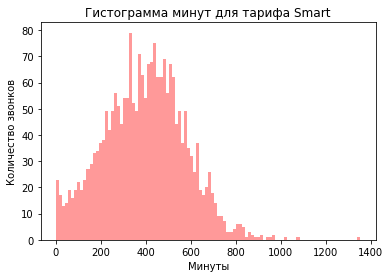

In [43]:
#sns.set(style = 'whitegrid')
#df_smart = df_users_counts.query('tariff == "smart"')
#plt.figure(figsize = (12,6))
#plt.title('Распределение ')
#ax = sns.boxplot(data = df_smart, x = 'minutes',y = 'count_calls', palette = "Set2")
#df_users_counts.query('tariff == "smart"').sort_values(ascending = False)
#df_users_counts.query('tariff == "smart"')['minutes'].hist(bins = 100, range = 178)
#sns.distplot(data=df_users_counts, x="minutes", binwidth=0.05, hue="tariffs")#
#tips_df = sns.load_dataset('tips')
#tips_df.head()
df_smart = df_users_counts.query('tariff == "smart"')
plt.title("Гистограмма минут для тарифа Smart")
plt.ylabel('Количество звонков')
sns.distplot(df_smart['minutes'],axlabel  = 'Минуты',color = 'Red',kde = False, bins = 100)

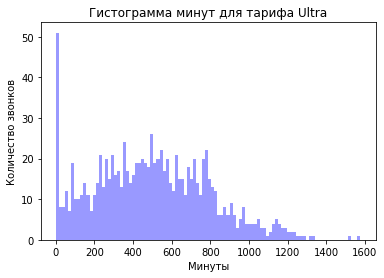

In [44]:
df_ultra = df_users_counts.query('tariff == "ultra"')
plt.title("Гистограмма минут для тарифа Ultra")
plt.ylabel('Количество звонков')
sns.distplot(df_ultra['minutes'],axlabel = 'Минуты',color = 'Blue',kde = False, bins = 100)


Видим, что пользователи тарифа Smart чаще предпочитают нагаваривать 200-600 минут по тарифу, хотя после 500 минут - истечения трафика - идёт резкий скачок вниз, а после 600 минут - следующий скачок.
Пользователи тарифа Ultra предпочитают по-другому использовать тарифный план. Так, видим, что аж 50 записей в таблице, где клиенты не завонили. Кусочек от 800 и более минут более "жирный", чем у другого тарифа. И более равномерное распределение, нет даже 25 записей с одинаковым количеством минут.
Далее посмотрим, как обстоят дела с сообщениями.

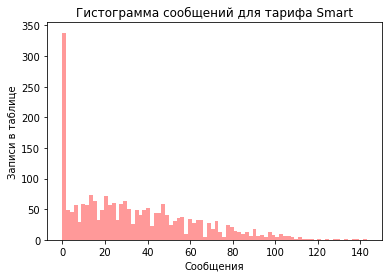

In [45]:
plt.title("Гистограмма сообщений для тарифа Smart")
plt.ylabel('Записи в таблице')
sns.distplot(df_smart['messages'],axlabel = 'Сообщения',color = 'Red',kde = False, bins = 80)

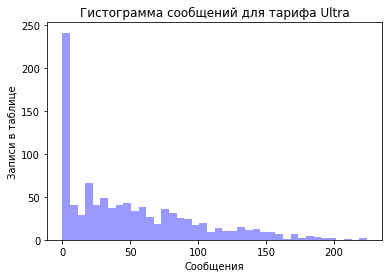

In [46]:
plt.title("Гистограмма сообщений для тарифа Ultra")
plt.ylabel('Записи в таблице')
sns.distplot(df_ultra['messages'],axlabel = 'Сообщения',color = 'Blue',kde = False, bins = 40)

В Smart почти 350 пустых записей, что достаточно много.В Ultra всего лишь чуть менее, чем 250 пустых записей. Далее зависимость примерно одинаковая до 75 сообщений, затем в Ultra идёт скачок вверх и график идёт выше, чем в Smart, так же наблюдаются записи в таблице с 150 и более сообщения, вплоть до почти 250, чего нет в тарифе Smart
Посмотрим, что с используемым интернетом.

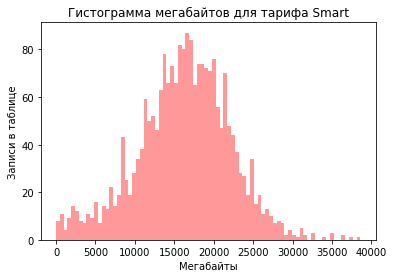

In [47]:
plt.title("Гистограмма мегабайтов для тарифа Smart")
plt.ylabel('Записи в таблице')
sns.distplot(df_smart['mb_used'],axlabel = 'Мегабайты',color = 'Red',kde = False, bins = 80)

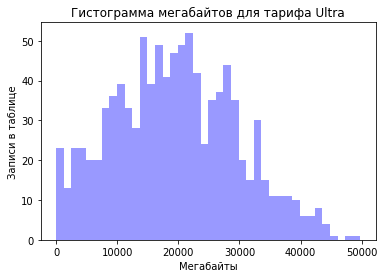

In [48]:
plt.title("Гистограмма мегабайтов для тарифа Ultra")
plt.ylabel('Записи в таблице')
sns.distplot(df_ultra['mb_used'],axlabel = 'Мегабайты',color = 'Blue',kde = False, bins = 40)

Наблюдаем, что в тарифе Smart рост идёт по параболе до пикового значения в примерно 17 тысяч мегабайт, что немного превышает нормы тарифа, а дальше так же по параболе идёт вниз. В Ultra локальных пиков больше, очень много записей в районе от 10 до 30 тысяч мегабайт, дальше идёт оплата сверх тарифа, есть ещё один локальный пик примерно на 33 тысячах, после него резкий спад. В принципе, записей с более 30 тысяч мегабайт, намного больше, чем в тарифе Smart, значит, и клиенты пользуются интернетом в больших количествах.

# Шаг 4. Проверка гипотез

Сформируем нулевую гипотезу Ho : средние двух генеральных совокупностей равны между собой. Тогда альтернативная гипотеза H1 гласит : средние двух генеральных совокупностей не равны.
Проверим гипотезу o равенстве средних двух генеральных совокупностей. equal_var задаём равным False, потому что дисперсия разная.

In [49]:
sample_smart = df_users_counts.query('tariff == "smart"')['proceed']
sample_ultra = df_users_counts.query('tariff == "ultra"')['proceed']
results = st.ttest_ind(sample_smart, sample_ultra, equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1789655228136608e-270
Отвергаем нулевую гипотезу


Видим, что p-значение практически нулевое. Нулевую гипотезу опровергаем. Выручка различна.
Нулевая гипотеза Ho для сравнения данных в регионах и Москве будет звучать так: средние двух генеральных совокупностей равны между собой. Тогда альтернативная гипотеза H1 будет такой - средние двух генеральных совокупностей не равны .
Посмотрим теперь на гипотезу : средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Сначала для smart

In [50]:
sample_smart_Moscow = df_users_counts.query('tariff == "smart" and city == "Москва"')['proceed']
sample_ultra_Moscow = df_users_counts.query('tariff == "smart"')['proceed']
results = st.ttest_ind(sample_smart_Moscow, sample_ultra_Moscow, equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.24123527279292067
Не получилось отвергнуть нулевую гипотезу


Вывод : Мы не опровергли гипотезу, что выручка между другими городами и Москвой различается. Значит, она примерно равна
Теперь для ultra

In [51]:
sample_smart_Moscow = df_users_counts.query('tariff == "ultra" and city == "Москва"')['proceed']
sample_ultra_Moscow = df_users_counts.query('tariff == "ultra"')['proceed']
results = st.ttest_ind(sample_smart_Moscow, sample_ultra_Moscow, equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8682482588918694
Не получилось отвергнуть нулевую гипотезу


Вывод : Мы не опровергли гипотезу, что выручка между другими городами и Москвой различается. Значит, она примерно равна

# 5 Общий вывод.

    В данной работе был проведён анализ двух тарифов на предмет прибыльности. В ходе работы данные были приведены к нужному типу, отброшены не нужные для исследования значения, посчитана и добавлена в отдельный столбец функция, рассчитывающая прибыль. Посчитаны медиана для количества сообщений и мегабайтов для обоих тарифов, а так же  дисперсия и стандартное отклонение для количества минут для обоих тарифов. Были построены гистограммы для количетсва минут, сообщений и мегабайтов для обоих тарифов. Были проверены нулевая и альтернативная гипотезы для обоих тарифов в целом и для Москвы и других региново по обоим тарифвм. Можно сделать вывод, что тариф Ultra более выгодный.

# 6 Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  соединены датафреймы в единый датафрейм
- [x]  написана функция для подсчёта выручки для каждого тарифа
- [x]  посчитана дисперсия, стандартное отклонение, медиана для количества минут, сообщений и интернет-трафика
- [x]  построены гистограммы для минут, сообщений и интернет-трафика для обоих тарифов
- [x]  проверено две гипотезы: o равенстве средних двух генеральных совокупностей. equal_var задаём равным False,        потому что дисперсия разная и средняя выручка пользователей из Москвы отличается от выручки пользователей          из других регионов для ообоих тарифов  
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод